# Import libraries



In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the dataset


In [10]:
data = pd.read_csv('/Housing.csv')

# Step 2: Data overview

In [11]:
print("Dataset Overview:")
print(data.head())


Dataset Overview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [12]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# Step 3: Data cleaning
# Drop rows with missing values

In [13]:
data = data.dropna()

In [29]:
data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce')
data['bathrooms'] = pd.to_numeric(data['bathrooms'], errors='coerce')


In [30]:
if data.isnull().sum().any():
    print("Dataset contains missing values. Please clean the data.")


In [32]:
#Data Normalization/Standardization: Standardize the features for better model performance:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Step 4: Exploratory Data Analysis (EDA)
# Price distribution

In [15]:
print(data.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


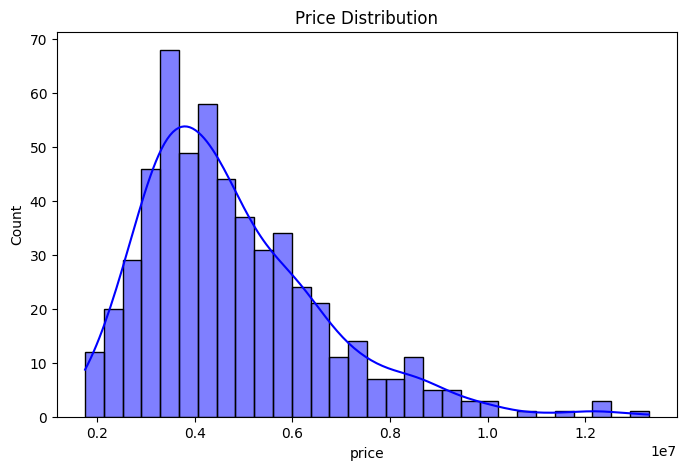

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('price')
plt.show()

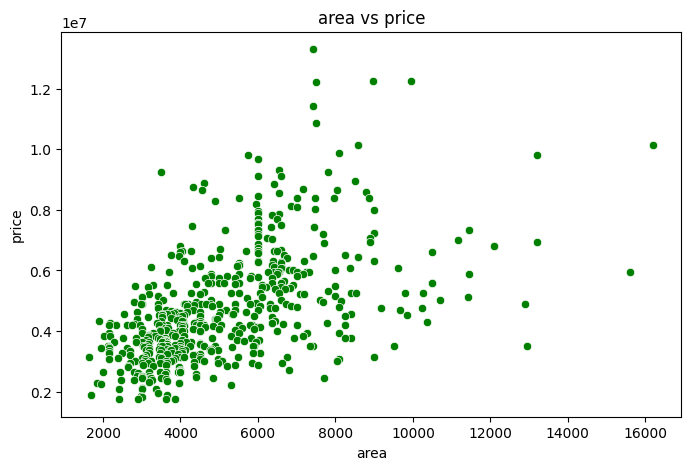

In [33]:
# Scatter plot for area vs price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['area'], y=data['price'], color='green')
plt.title('area vs price')
plt.xlabel('area')
plt.ylabel('price')
plt.show()


In [36]:
#Save the Model: Save the trained model for reuse using joblib or pickle
import joblib
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [40]:
import numpy as np
import joblib  # Directly import joblib
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", message=".*X does not have valid feature names.*")

# Load the model
loaded_model = joblib.load('house_price_model.pkl')

# Example new data for prediction
new_data = np.array([[1500, 3, 2, 2010]])  # Replace with new inputs

# Predict
new_prediction = loaded_model.predict(new_data)
print("Predicted Price:", new_prediction[0])



Predicted Price: 925143663.57335


# Correlation matrix

Numeric Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


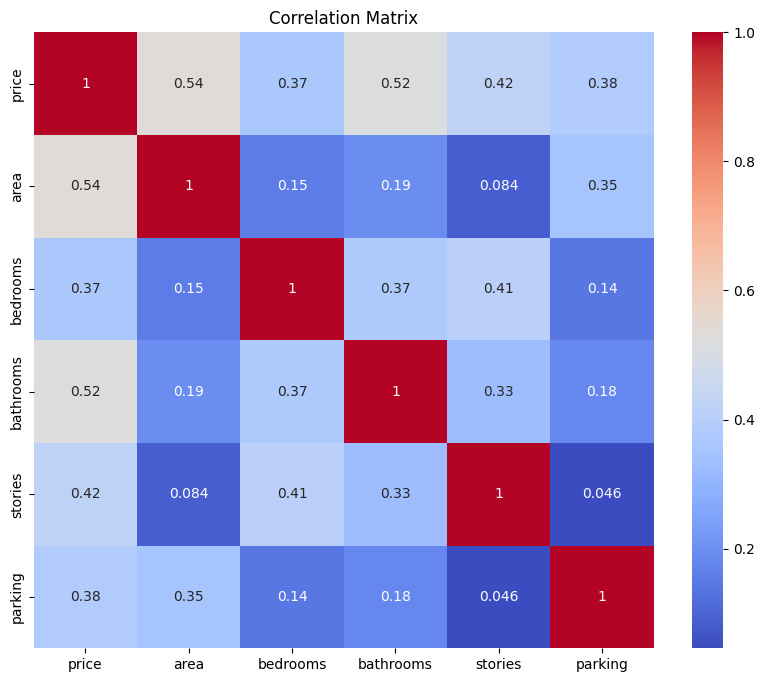

In [18]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=[np.number])
print("Numeric Columns:", numeric_data.columns)

# Generate correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Step 5: Feature selection

In [20]:
print("Columns in dataset:", data.columns)


Columns in dataset: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [21]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']


# Step 6: Train-test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Model training


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 8: Model evaluation

In [24]:
y_pred = model.predict(X_test)


In [25]:
print("\nModel Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R2):", r2_score(y_test, y_pred))


Model Performance:
Mean Absolute Error (MAE): 1088088.9140581125
Mean Squared Error (MSE): 2116673381183.6726
Root Mean Squared Error (RMSE): 1454879.163773979
R-squared (R2): 0.5084809351991424


# Step 9: Visualizing predictions

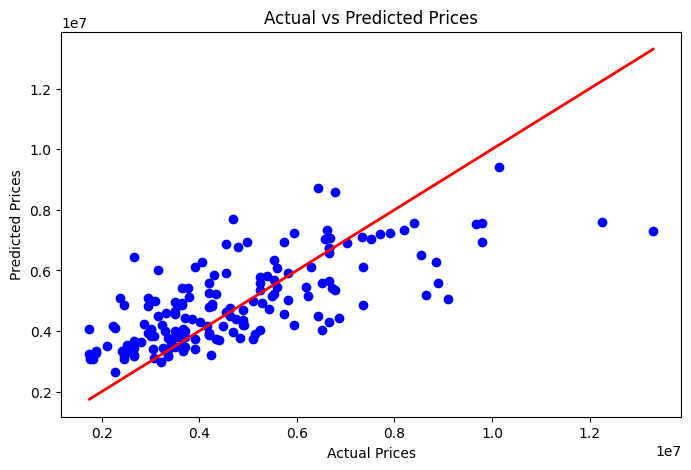

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Step 10: Model coefficients

In [27]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
     Feature   Coefficient
0       area  3.750617e+02
1   bedrooms  1.969519e+05
2  bathrooms  1.236572e+06
3    stories  4.585269e+05
